In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Import Data 
source = '/Users/Administrator/Desktop/'
datafile = pd.read_csv(source + 'ACME-HappinessSurvey2020.csv')
dset = pd.DataFrame(datafile)
#displaying data
dset.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [37]:
# abtaining information about the dataset
dset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


In [69]:
# looking into statistical data properties
dset.describe()

,Y,X1,X2,X3,X4,X5,X6
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.547619,4.333333,2.531746,3.309524,3.746032,3.650794,4.253968
std,0.499714,0.800000,1.114892,1.023440,0.875776,1.147641,0.809311
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


# Exploratory Data Analysis for this dataset

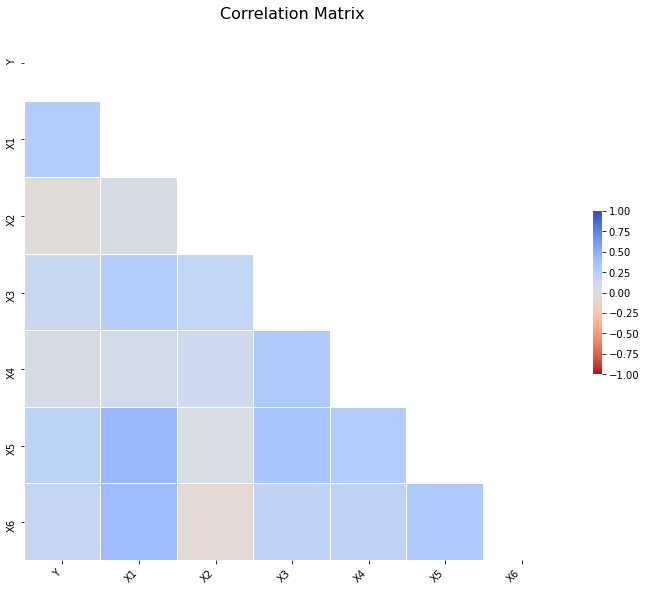

In [5]:
import seaborn as sns
#plot a correlation matrix
plt.figure(figsize=(12,10))
corr = dset.corr()
#plt.rcParams["figure.figsize"] = (10,10)
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
cmap='coolwarm_r',    
mask=mask, 
square=True,    
linewidths=.3,
cbar_kws={"shrink": .3},   
)

ax.set_xticklabels(

    ax.get_xticklabels(),

    rotation=45,

    horizontalalignment='right'

);


plt.title('Correlation Matrix', fontsize=16);

In [6]:
dset['Y'].value_counts()

1    69
0    57
Name: Y, dtype: int64

# Data Engineering

In [4]:
#x and y axes input data
y = dset['Y']
x =  dset.drop(['Y'], axis = 1)

In [5]:
X = np.array(x)
Y = np.array(dset['Y'])

In [23]:
# Split data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)

# Model 

In [24]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(i) for i in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(j) for j in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [25]:
from sklearn.ensemble import RandomForestClassifier
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier(max_depth=12)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 15, cv = 3, verbose=2, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   21.2s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   33.1s finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(max_depth=12),
                   n_iter=15, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   verbose=2)

In [26]:
rf_random.best_params_

{'n_estimators': 2000,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 40,
 'bootstrap': True}

Next I evaluate each model performance for overfitting problem  detection

In [27]:
scoretest = rf_random.score(X_test, y_test)
    
print('Model Performance')
    
print('Accuracy = {:0.2f}%.'.format(scoretest))


Model Performance
Accuracy = 0.69%.


In [28]:
scoretrain = rf_random.score(X_train, y_train)
    
print('Model Performance')
    
print('Accuracy = {:0.2f}%.'.format(scoretrain))


Model Performance
Accuracy = 0.80%.


In [29]:
best_random = rf_random.best_estimator_
best_random

RandomForestClassifier(max_depth=40, max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=10, n_estimators=2000)

In [30]:
from sklearn.metrics import classification_report
predictions = best_random.predict(X_train)

print(classification_report(y_train, predictions))



              precision    recall  f1-score   support

           0       0.79      0.74      0.76        50
           1       0.80      0.84      0.82        63

    accuracy                           0.80       113
   macro avg       0.80      0.79      0.79       113
weighted avg       0.80      0.80      0.80       113



In [31]:
from sklearn.metrics import classification_report
prediction = best_random.predict(X_test)

print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.80      0.57      0.67         7
           1       0.62      0.83      0.71         6

    accuracy                           0.69        13
   macro avg       0.71      0.70      0.69        13
weighted avg       0.72      0.69      0.69        13



In [32]:
print('Improvement of {:0.2f}%.'.format( 100 * (scoretest - scoretrain) / scoretrain))

Improvement of -13.08%.


Next, I analyze what features are important  and remove if any not related to Happiness or Unhappiness of the customer. I give this job to identify to Python sklearn packages. 

In [35]:
best_random.feature_importances_

array([0.21169619, 0.14023614, 0.21529668, 0.11456097, 0.18582709,
       0.13238293])

<BarContainer object of 6 artists>

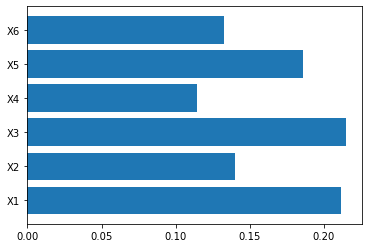

In [36]:
index=['X1','X2','X3','X4','X5','X6']
dsetfeat = pd.DataFrame(datafile, index=['X1','X2','X3','X4','X5','X6'],  columns=index)
plt.barh(dsetfeat.index, best_random.feature_importances_)

In [37]:
from sklearn.feature_selection import RFE
rf = RandomForestClassifier(max_depth=10, random_state=0)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, n_jobs = -1)
# Fit the random search model

selector = RFE(best_random, n_features_to_select=3, step=1)
selector = selector.fit(X_train, y_train)
selector.support_


selector.ranking_


array([1, 2, 1, 4, 1, 3])

In [38]:
for i in range(X_test.shape[1]):
    print('Column: %d, Selected %s, Rank: %.3f' % (i, selector.support_[i], selector.ranking_[i]))

Column: 0, Selected True, Rank: 1.000
Column: 1, Selected False, Rank: 2.000
Column: 2, Selected True, Rank: 1.000
Column: 3, Selected False, Rank: 4.000
Column: 4, Selected True, Rank: 1.000
Column: 5, Selected False, Rank: 3.000


All of the features has been selected in this case.

# Model overfitting detection and testing

In [39]:
# define the tree depths to evaluate
values = [i for i in range(1, 30)]

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
train_scores = []
test_scores = []
for i in values:
    # configure the model
    rf = RandomForestClassifier(max_depth=i)
    # fit model on the training dataset
    rf.fit(X_train, y_train)
    # evaluate on the train dataset
    train_yhat = rf.predict(X_train)
    train_acc = accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)
    # evaluate on the test dataset
    test_yhat = rf.predict(X_test)
    test_acc = accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)
    # summarize progress
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 0.637, test: 0.538
>2, train: 0.681, test: 0.538
>3, train: 0.770, test: 0.769
>4, train: 0.788, test: 0.692
>5, train: 0.858, test: 0.615
>6, train: 0.894, test: 0.769
>7, train: 0.912, test: 0.769
>8, train: 0.920, test: 0.769
>9, train: 0.929, test: 0.692
>10, train: 0.938, test: 0.846
>11, train: 0.938, test: 0.692
>12, train: 0.938, test: 0.769
>13, train: 0.938, test: 0.846
>14, train: 0.938, test: 0.769
>15, train: 0.938, test: 0.769
>16, train: 0.938, test: 0.769
>17, train: 0.938, test: 0.769
>18, train: 0.938, test: 0.769
>19, train: 0.938, test: 0.692
>20, train: 0.938, test: 0.692
>21, train: 0.938, test: 0.769
>22, train: 0.938, test: 0.846
>23, train: 0.938, test: 0.769
>24, train: 0.938, test: 0.692
>25, train: 0.938, test: 0.692
>26, train: 0.938, test: 0.846
>27, train: 0.938, test: 0.846
>28, train: 0.938, test: 0.769
>29, train: 0.938, test: 0.769


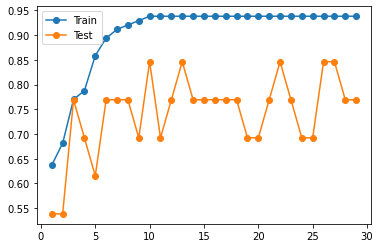

In [41]:
# plot of train and test scores vs tree depth
import matplotlib.pyplot as plt
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()

In [42]:
Pred = best_random.predict(X_test)
Pred

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0], dtype=int64)

In [43]:
Pred.shape

(13,)

In [44]:
dset = dset[:13]

In [45]:
Preds = []

for i in Pred: 
    if i == 1: 
       Preds.append('Happy') 
    elif i == 0: 
       Preds.append('Unhappy')


In [46]:
dset.insert(1, 'Predicted', Preds)

In [47]:
dset

,Y,Predicted,X1,X2,X3,X4,X5,X6
0,0,Happy,3,3,3,4,2,4
1,0,Happy,3,2,3,5,4,3
2,1,Happy,5,3,3,3,3,5
3,0,Happy,5,4,3,3,3,5
4,0,Happy,5,4,3,3,3,5
5,1,Happy,5,5,3,5,5,5
6,0,Happy,3,1,2,2,1,3
7,1,Unhappy,5,4,4,4,4,5
8,0,Unhappy,4,1,4,4,4,4
9,0,Unhappy,4,4,4,2,5,5


# Conclusion

After training a model, a gap between original data  and predicted is very low 13.08% and highest performance of the model at this time of macro average is 0.70 which is good  in  this given small dataset. Machine Learning models perform better on larger datasets but also can leverage from small datasets.  RandomForestClassifier  performed the best on this given data. After adding more data it will perform even better. Difference between training and test new  not known to the algorithm data is almost nothing.

I presented original data of happy and not happy customers  in the new dataset together  where results of predictions can be compared to what it was. Results can be convincing 70%. 

Testing for important features tells X1 , X3, X5 are what plays a role in a customer's happiness: X1 = my order was delivered on time, X3  = I ordered everything I wanted to order, X5 =  I am satisfied with my courier. X1,X3,X5 are what you need to focus on making customers happy. The Feature Selection test confirmed the same features. Correlation Matrix tells that features X1 and X5 are correlated. 